In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the uploaded dataset
file_path = '/content/Airline_customer_satisfaction.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Print the results
print(missing_values)

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


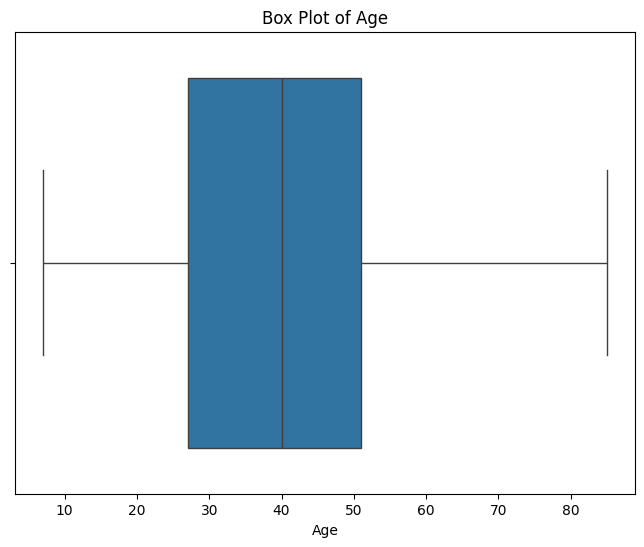

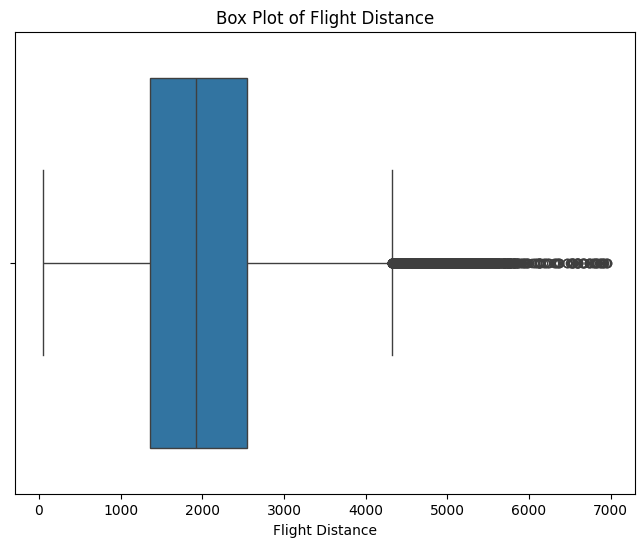

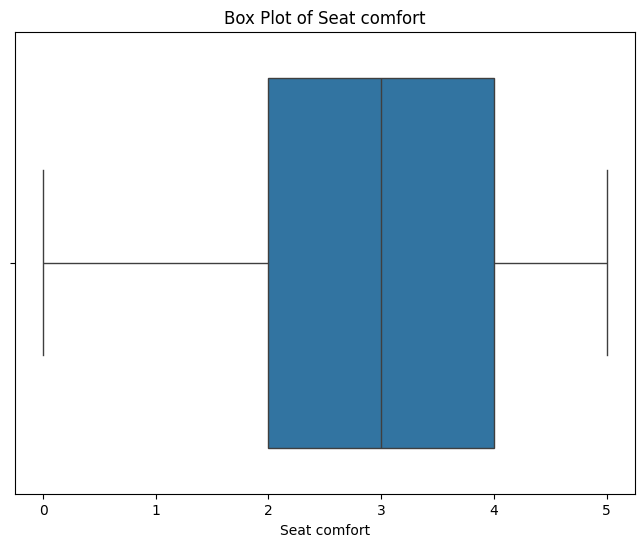

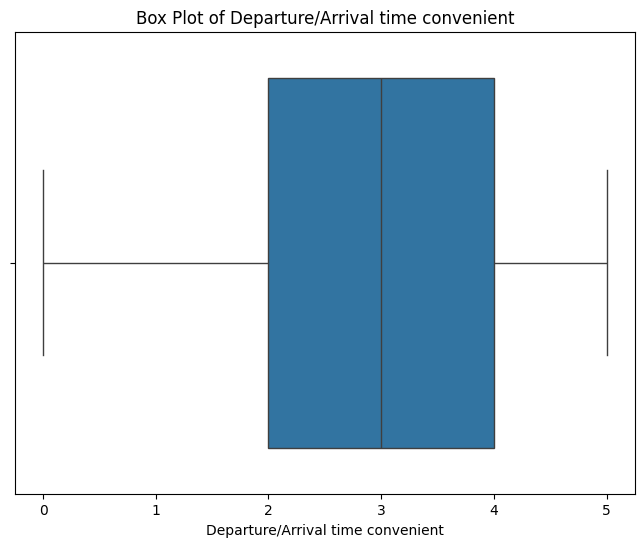

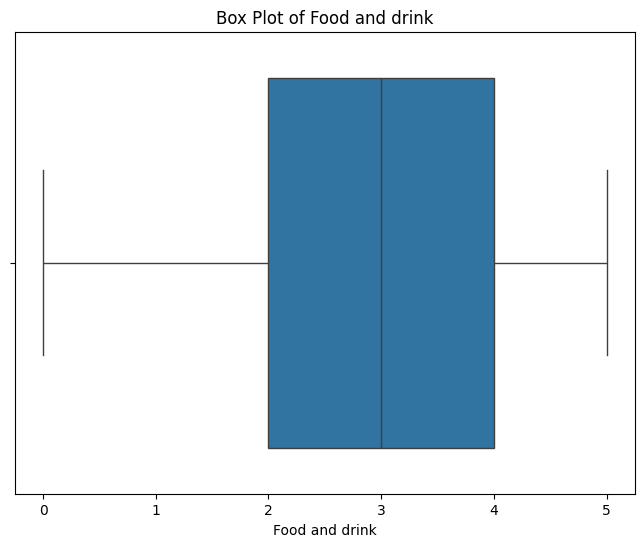

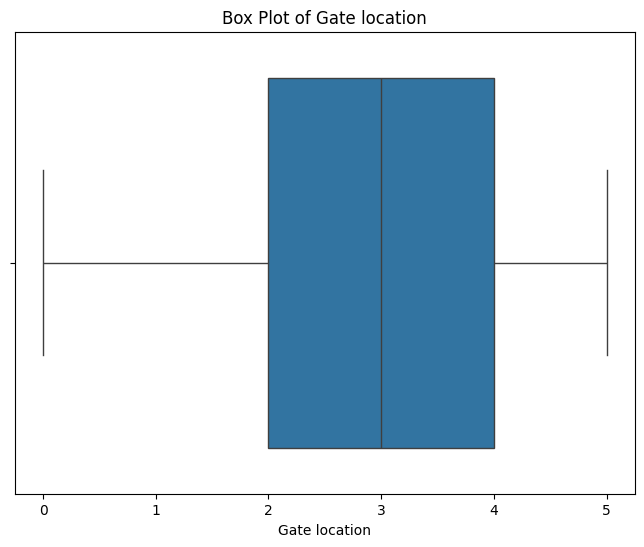

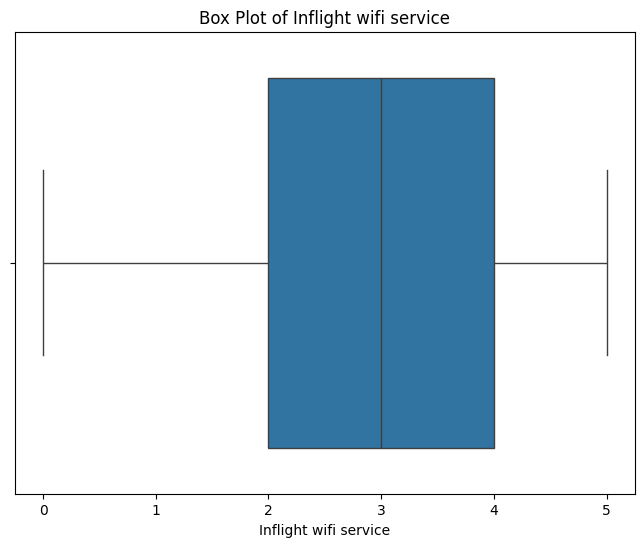

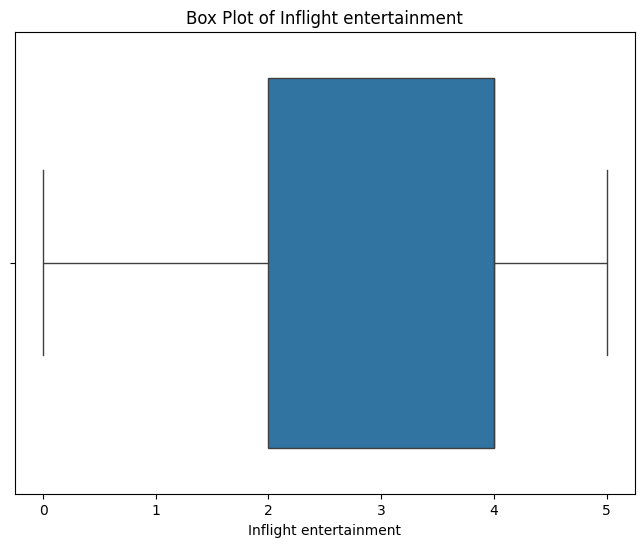

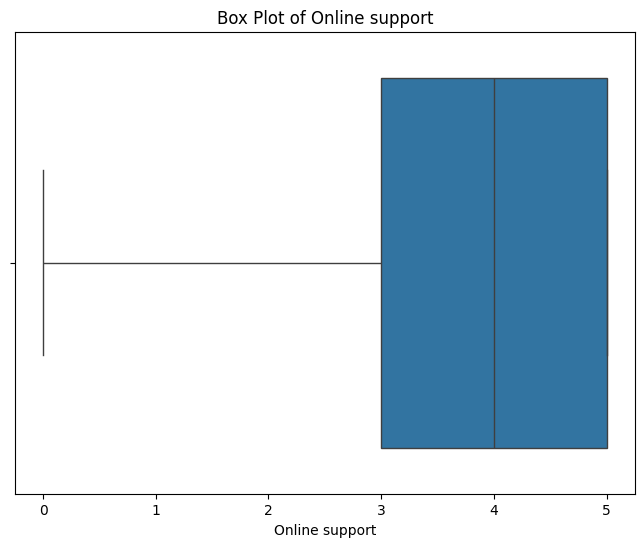

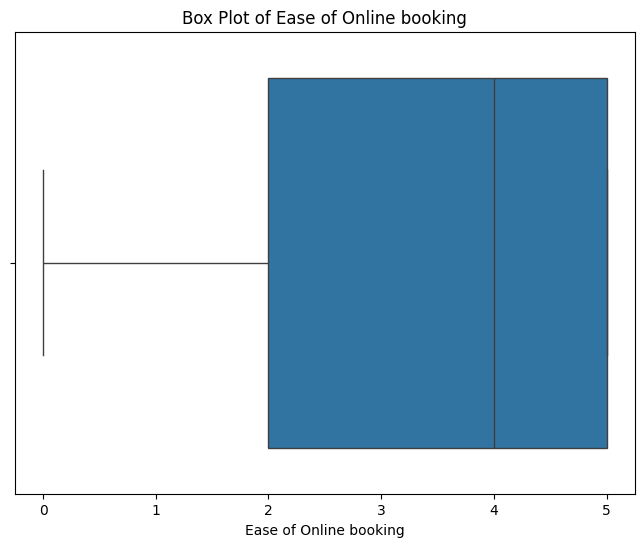

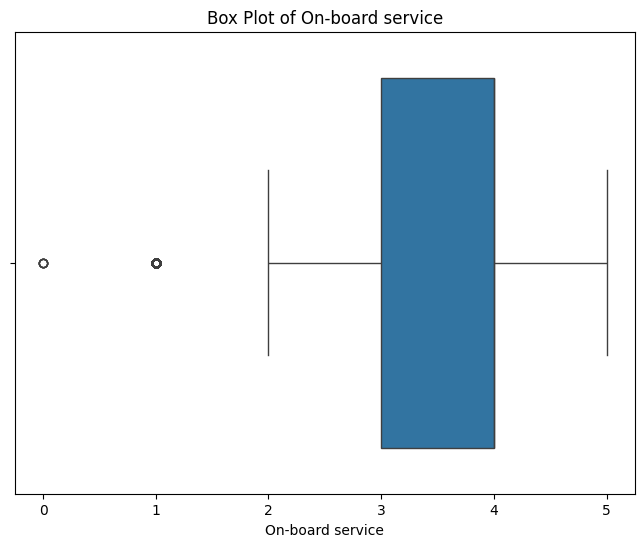

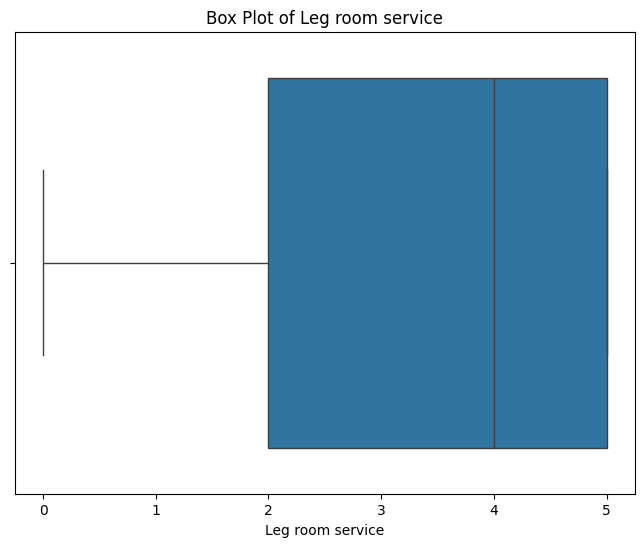

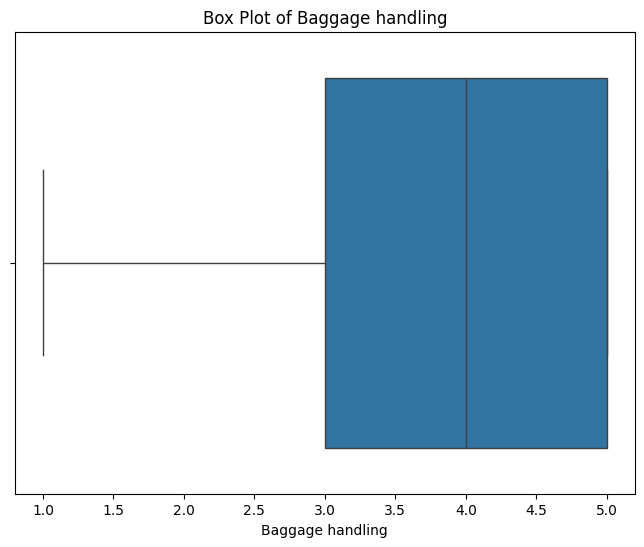

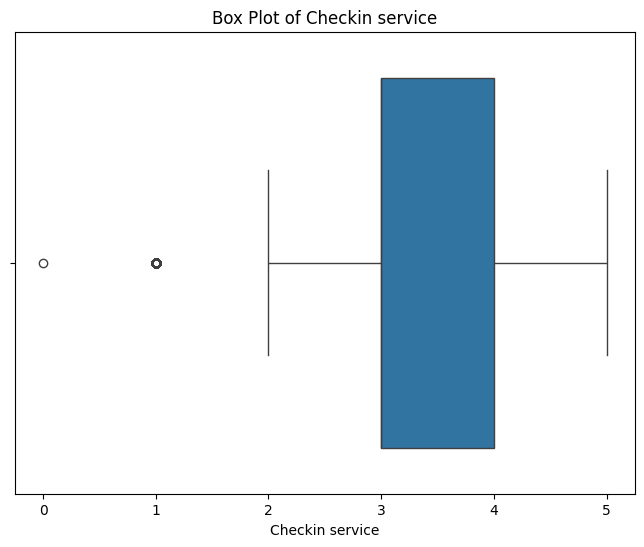

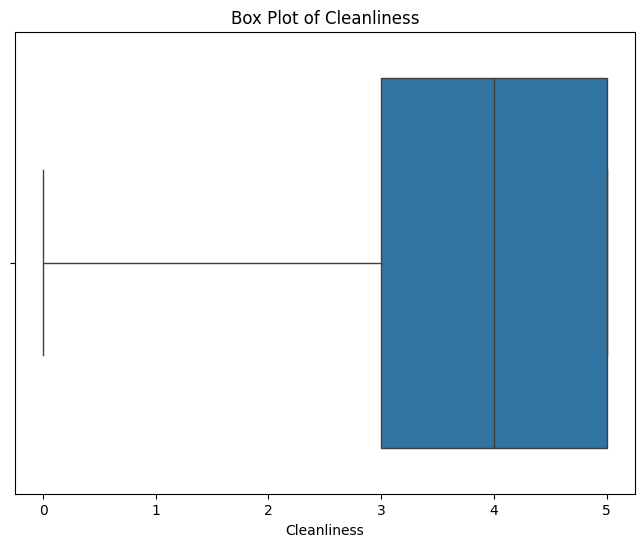

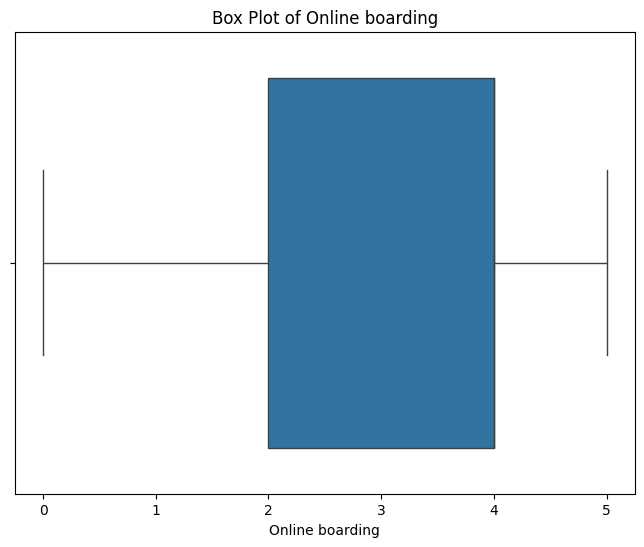

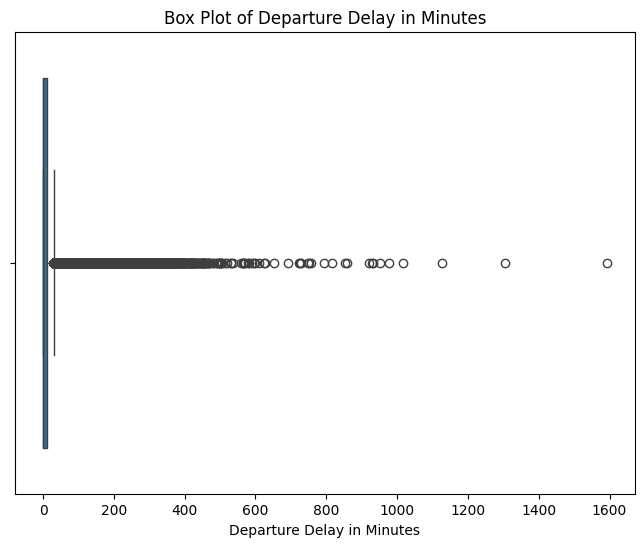

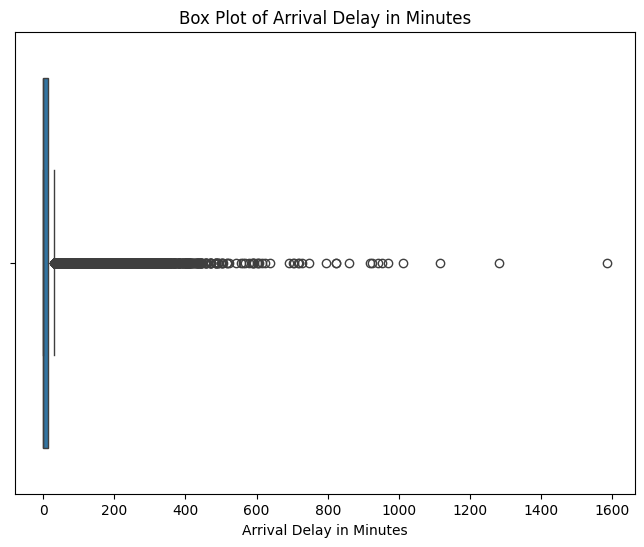

In [ ]:
# Select numerical features for box plots
numerical_features = data.select_dtypes(include=['number'])

# Create box plots for each numerical feature
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
def remove_outliers_iqr(data, column):
    """Removes outliers from a pandas DataFrame column using the IQR method.

    Args:
        data: pandas DataFrame.
        column: Name of the column to remove outliers from.

    Returns:
        pandas DataFrame with outliers removed.
    """

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

# Apply the function to your numerical features
for column in numerical_features.columns:
  data = remove_outliers_iqr(data, column) #Updates the dataframe
# View the updated dataframe to confirm outliers are removed.
data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0


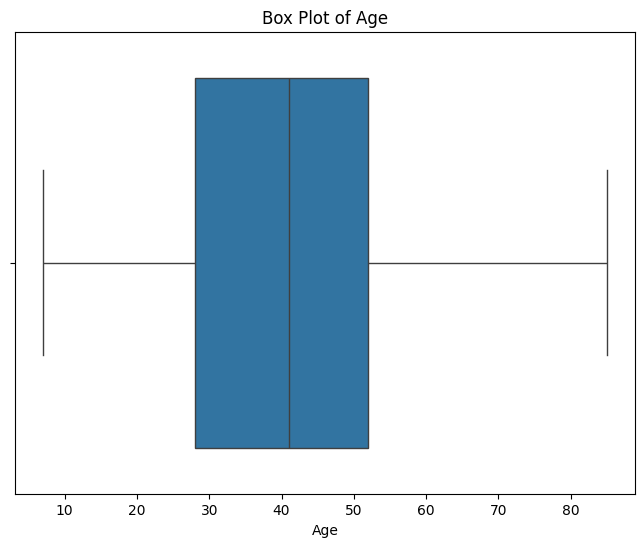

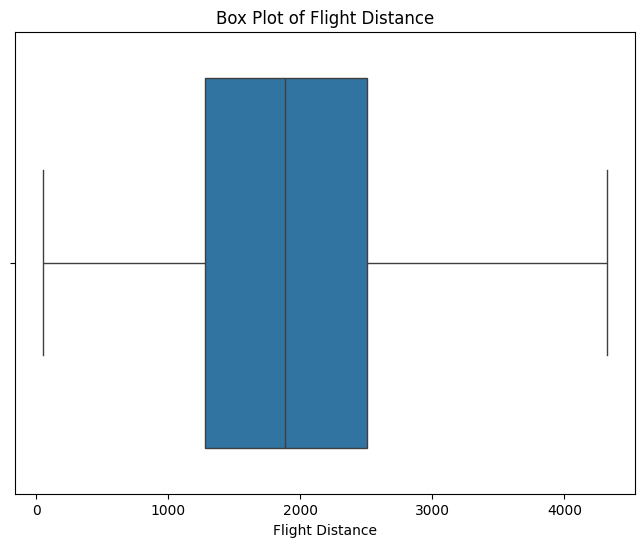

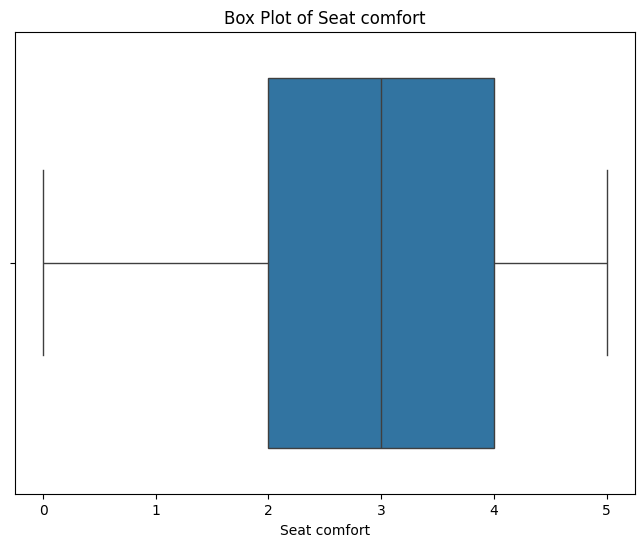

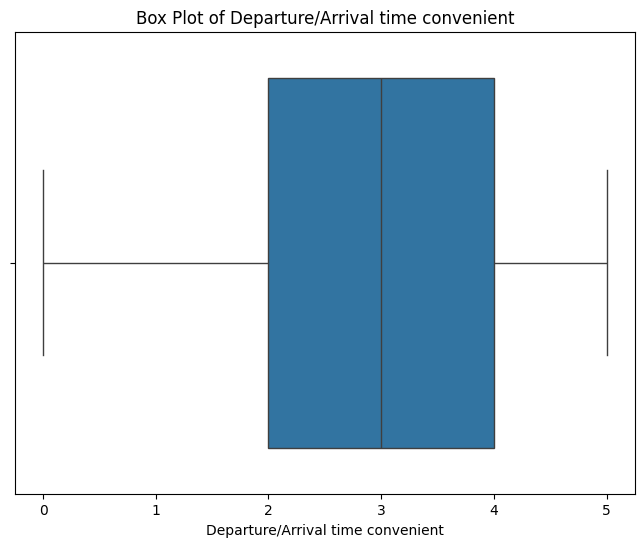

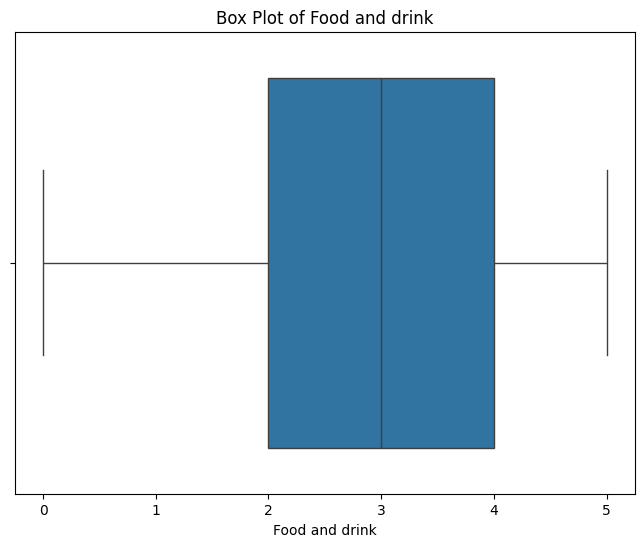

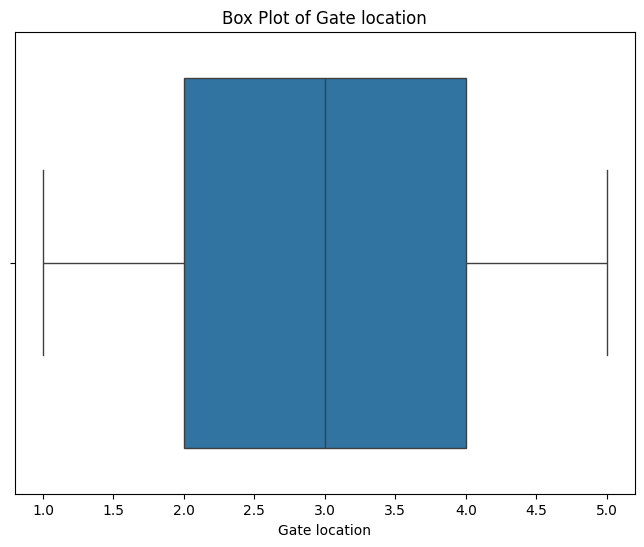

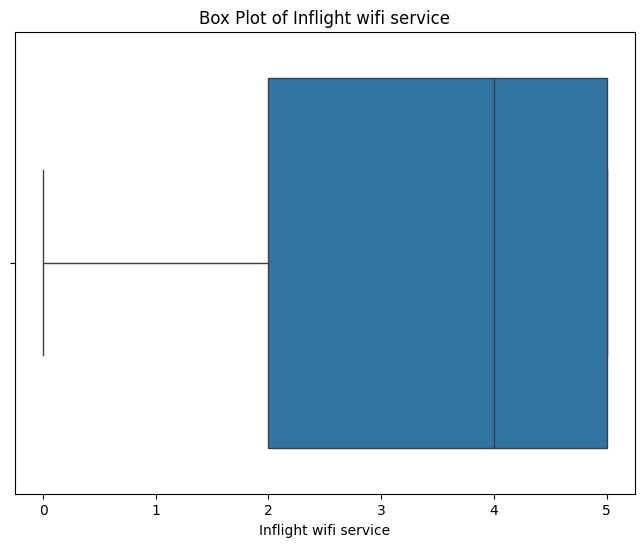

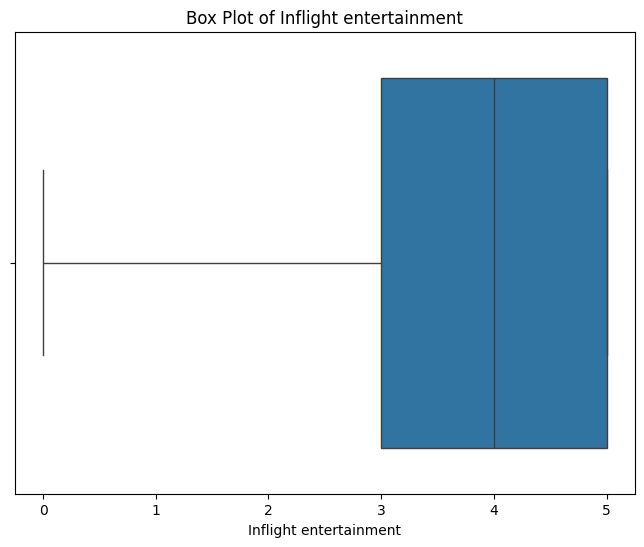

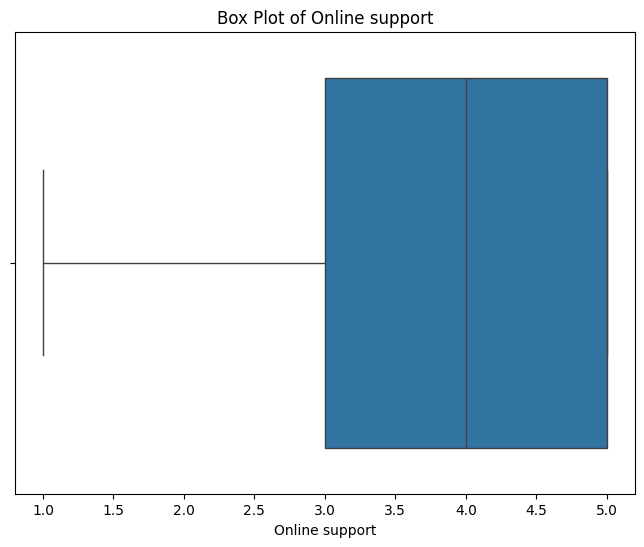

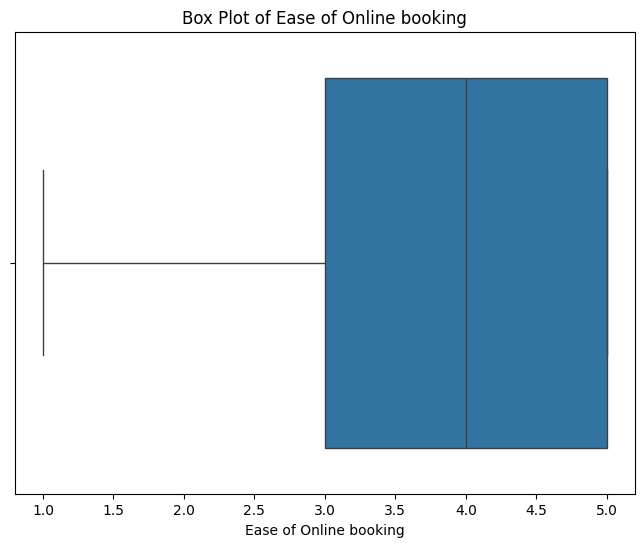

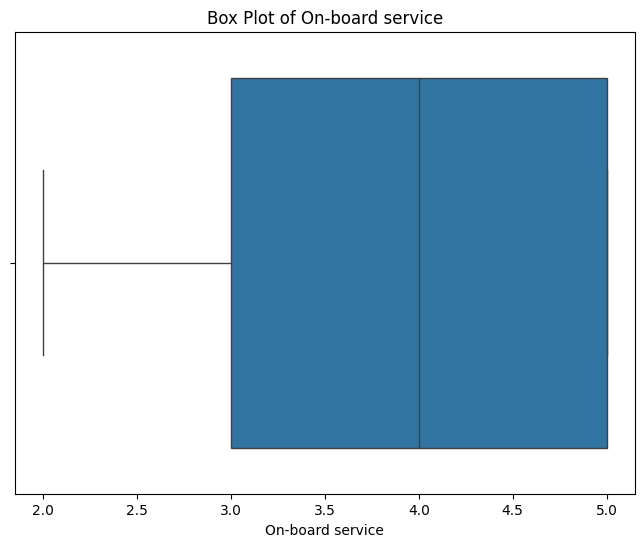

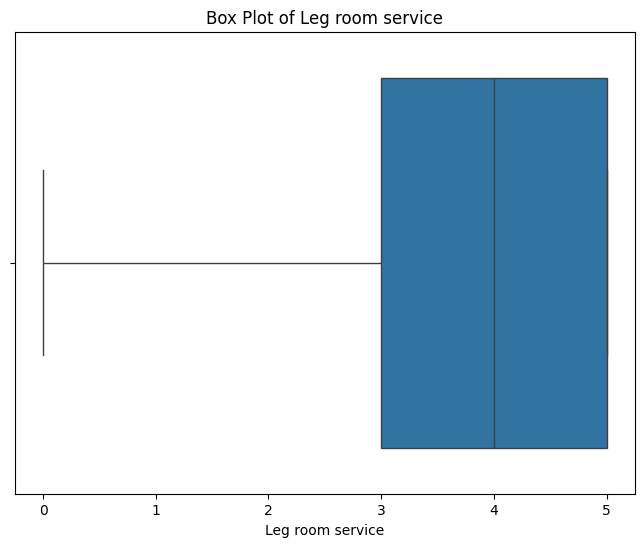

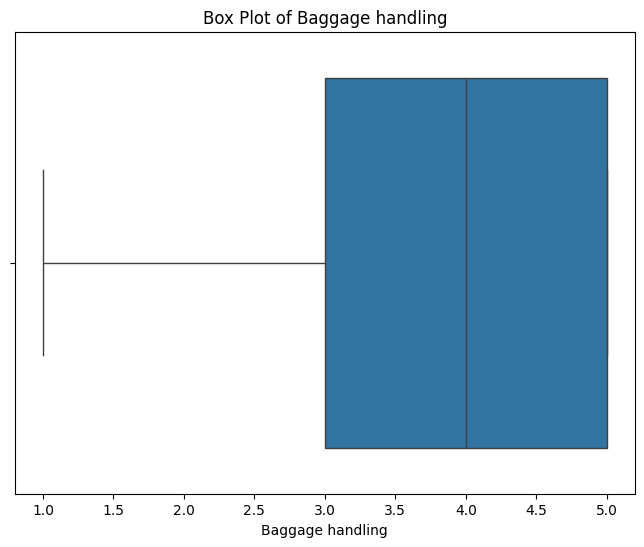

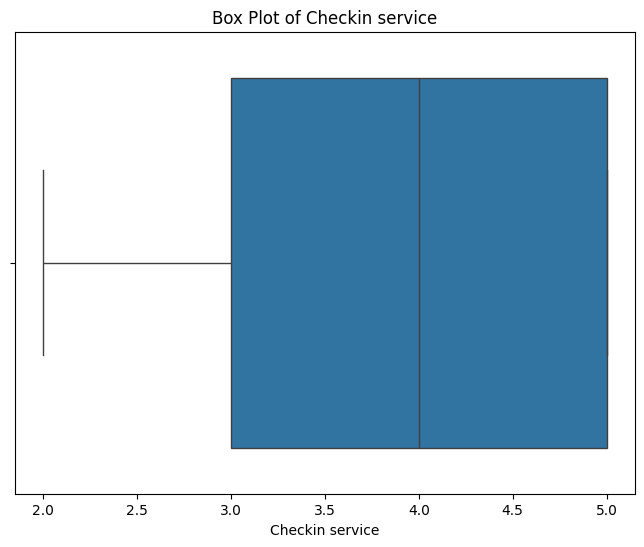

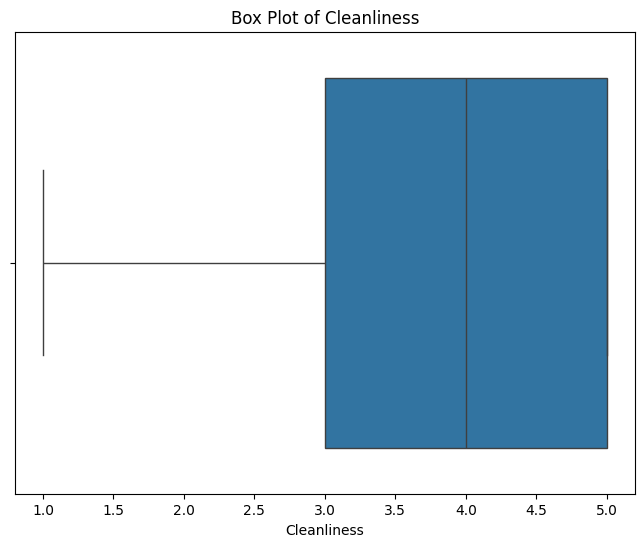

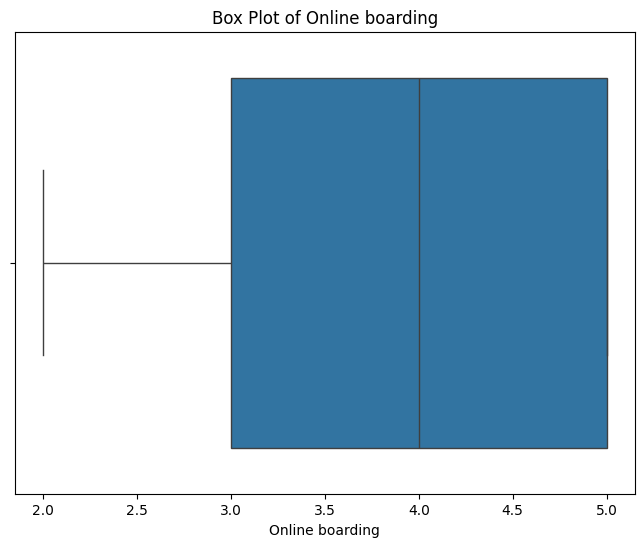

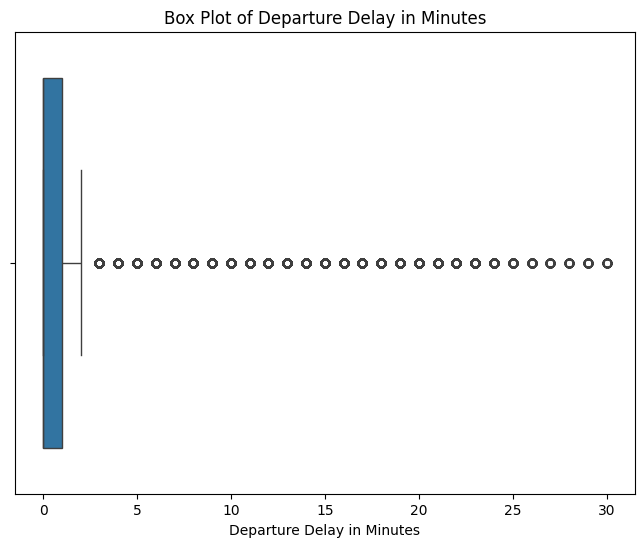

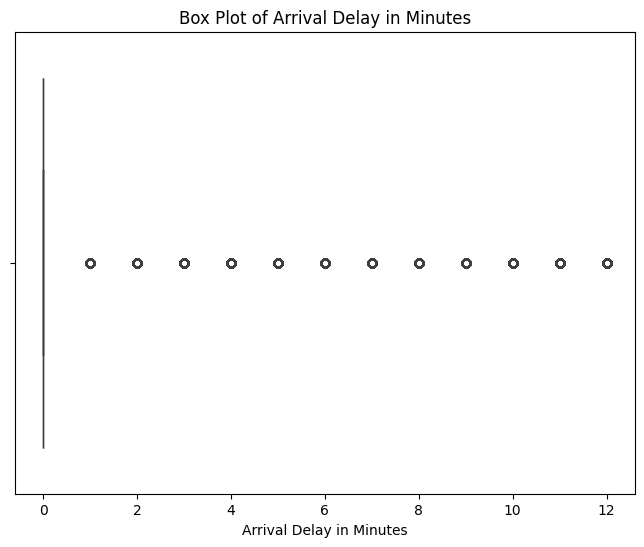

In [ ]:
# Select numerical features for box plots
numerical_features = data.select_dtypes(include=['number'])

# Create box plots for each numerical feature
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

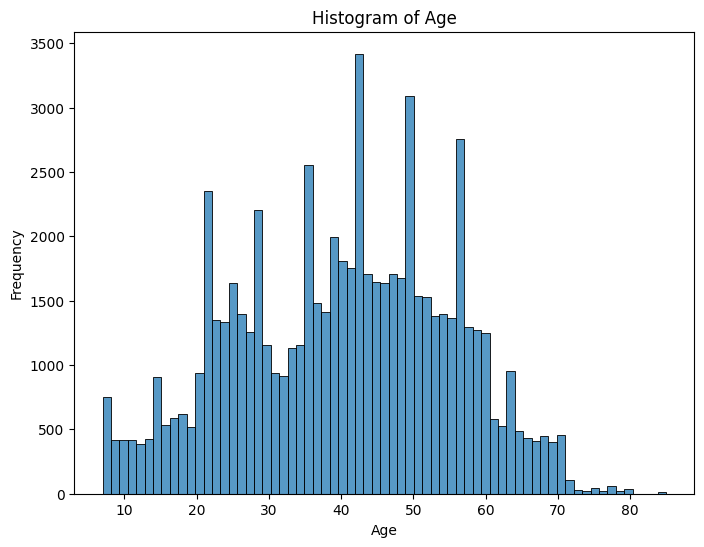

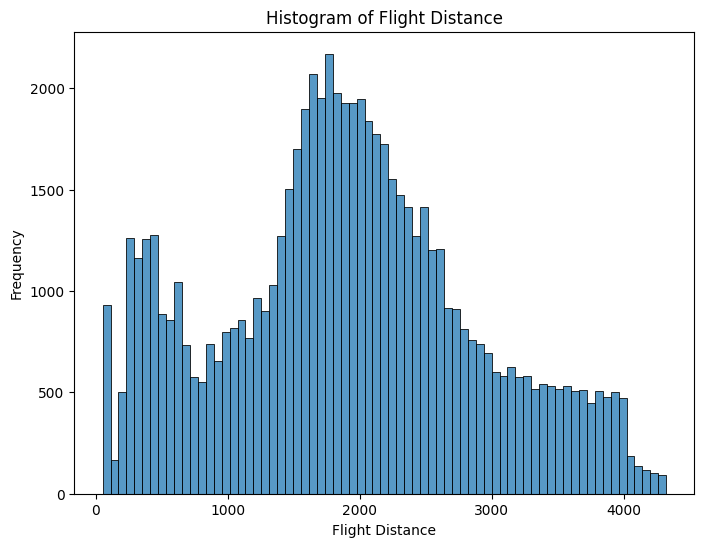

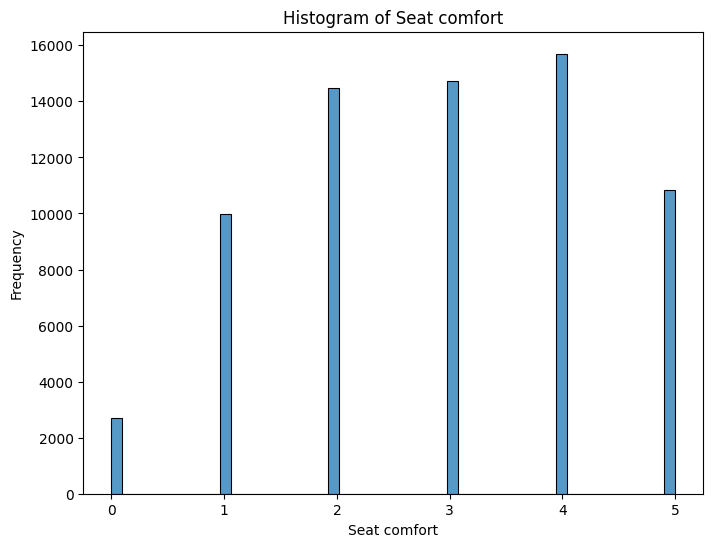

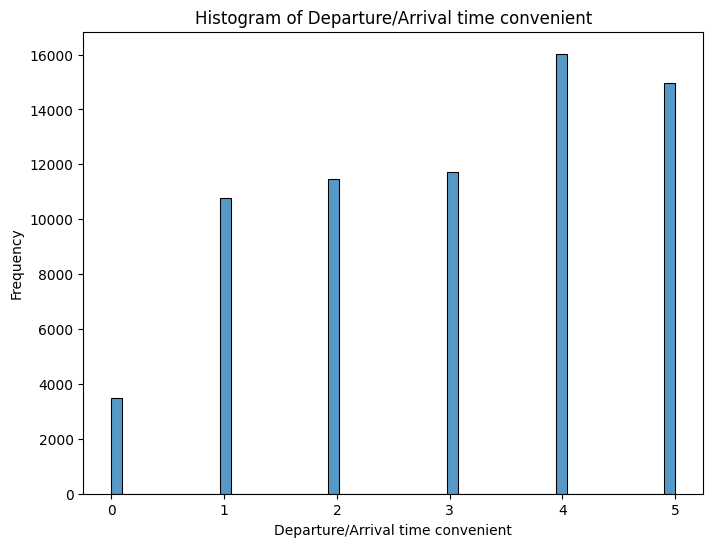

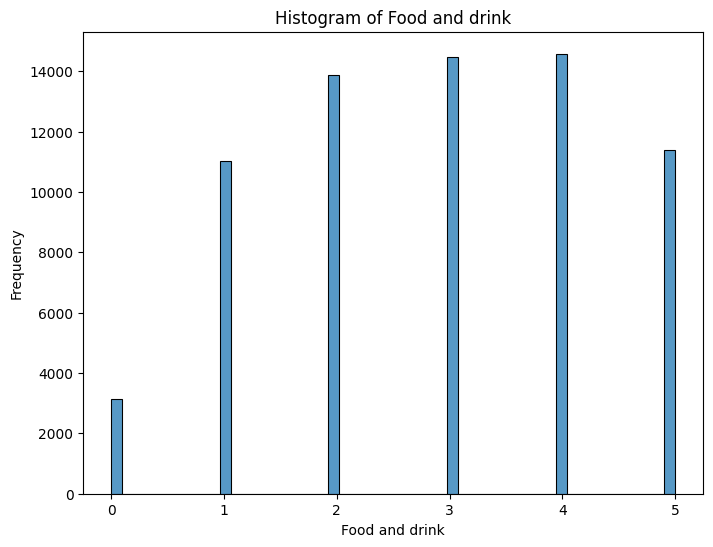

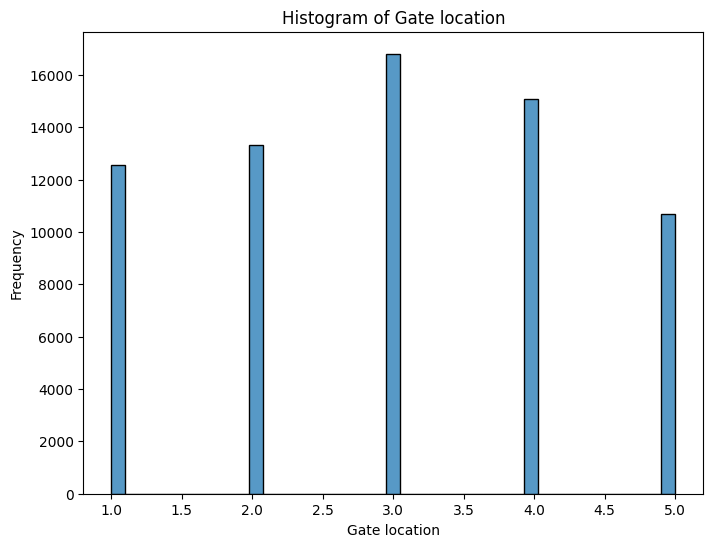

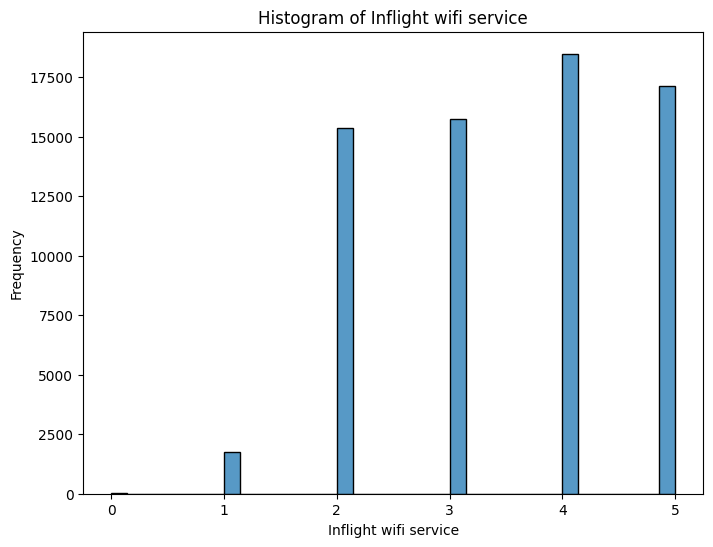

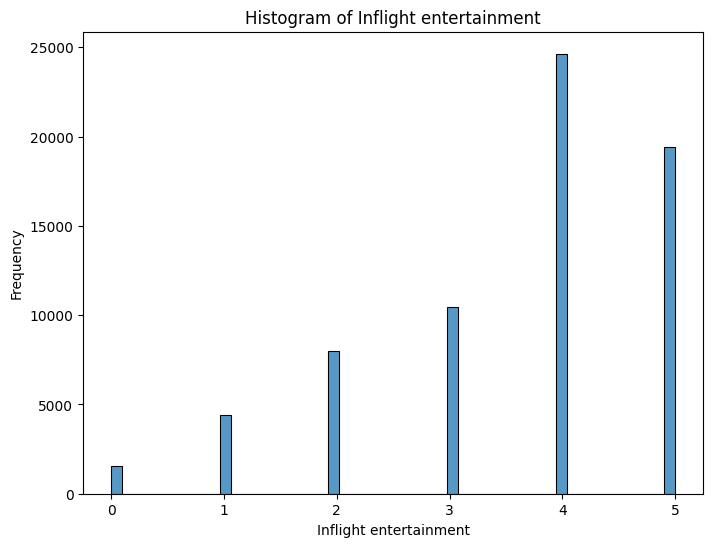

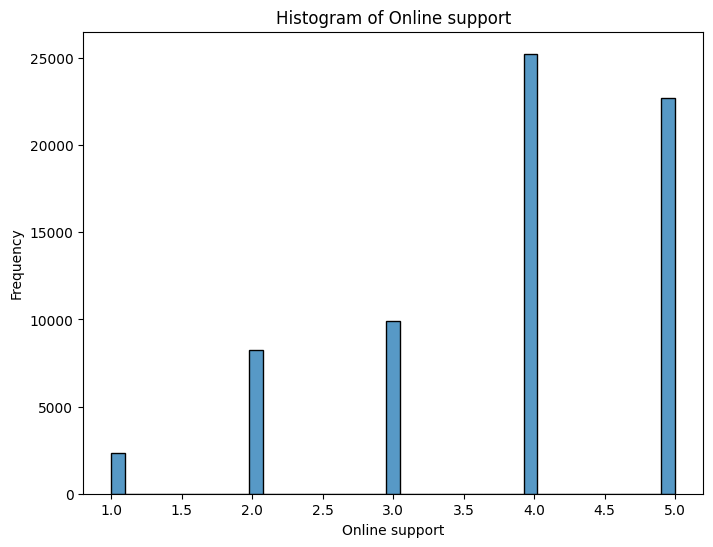

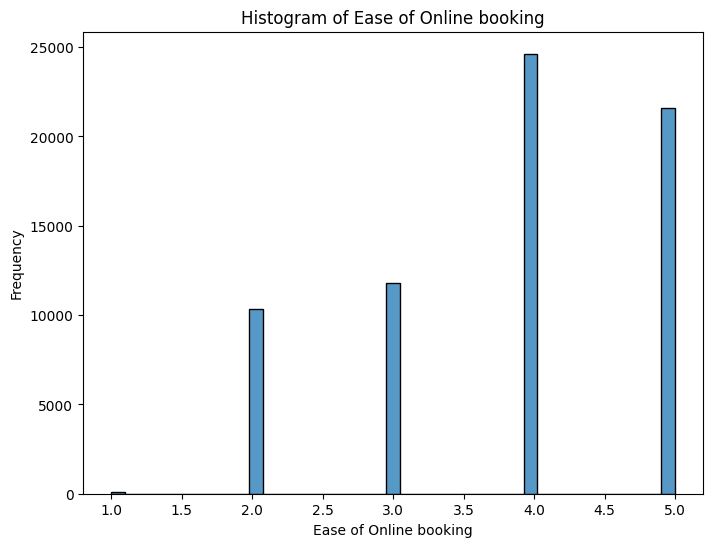

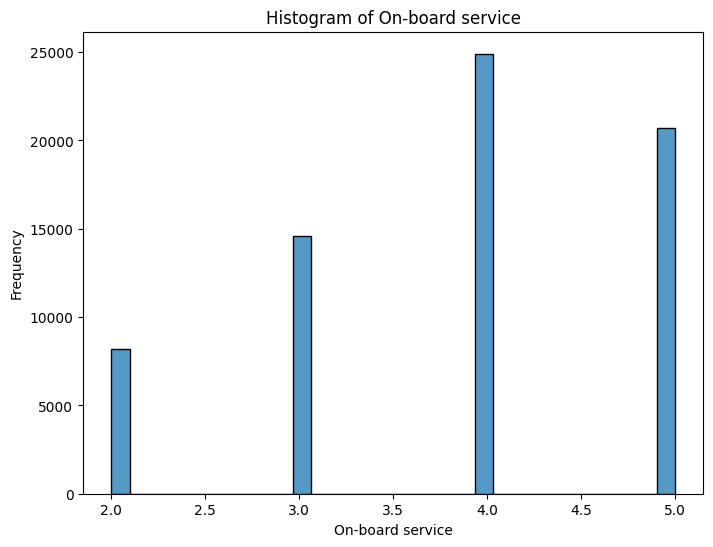

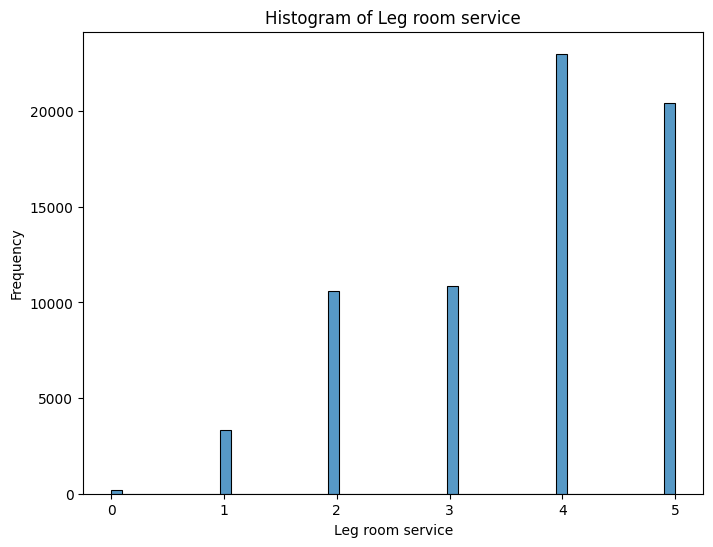

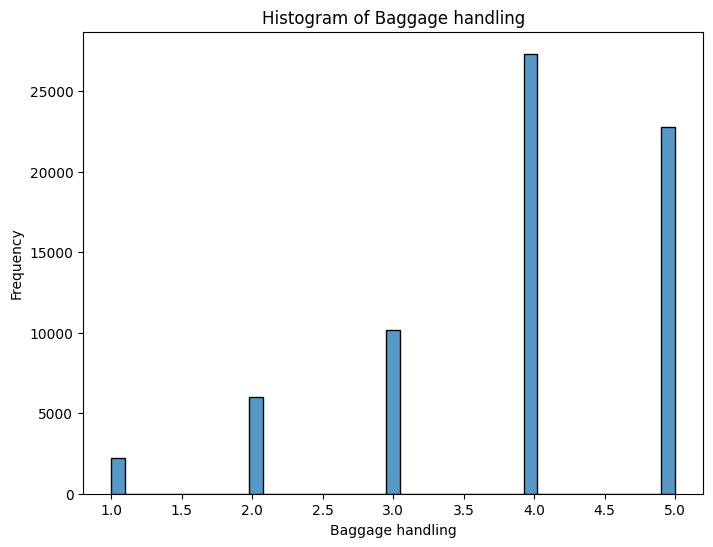

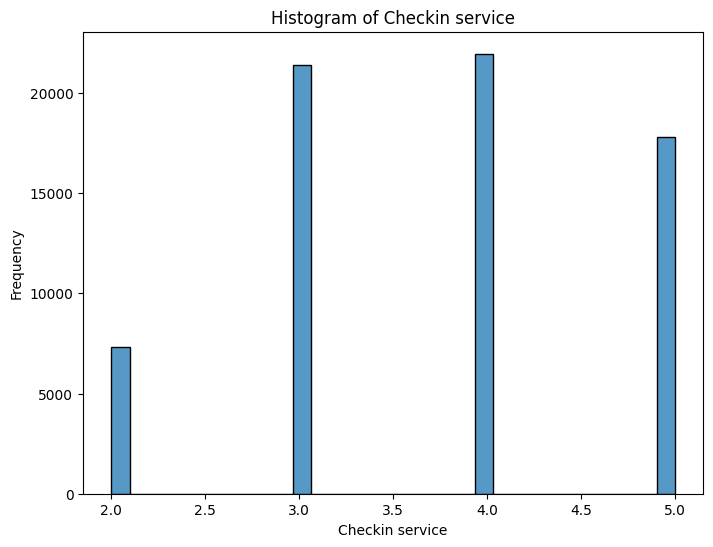

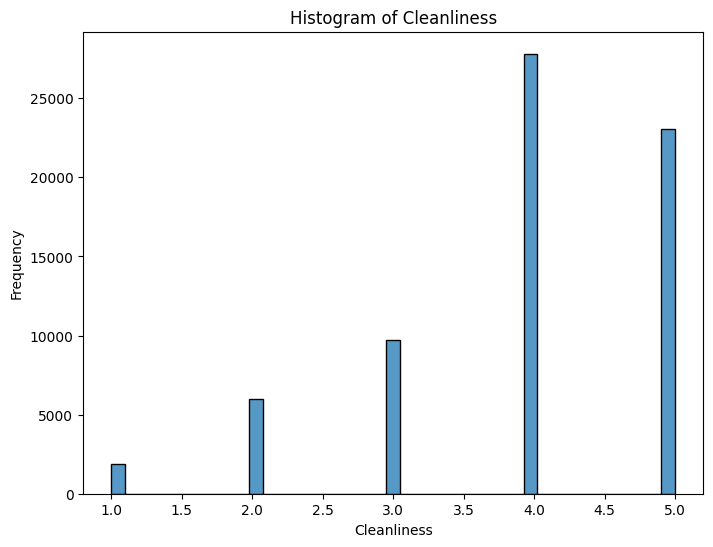

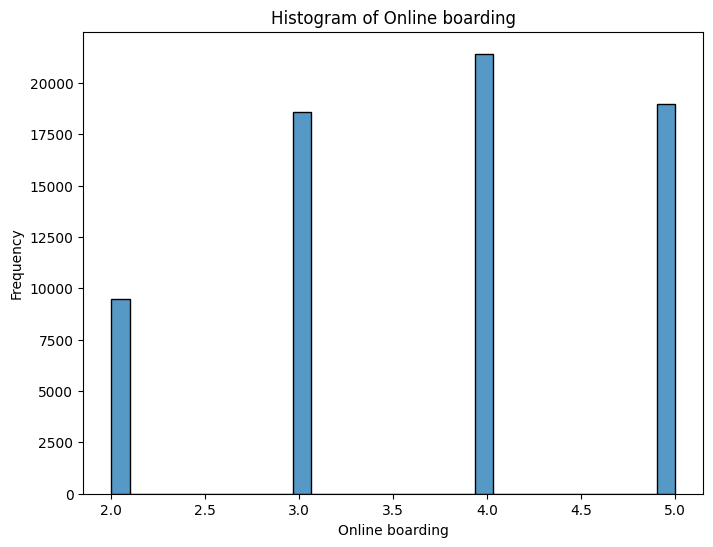

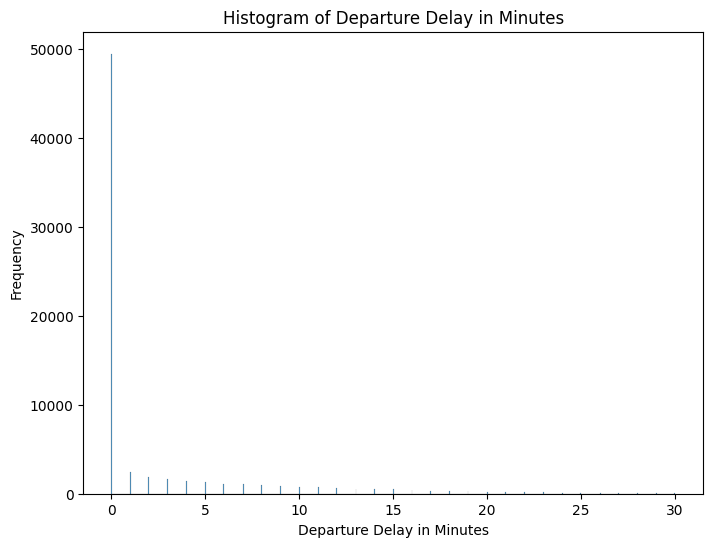

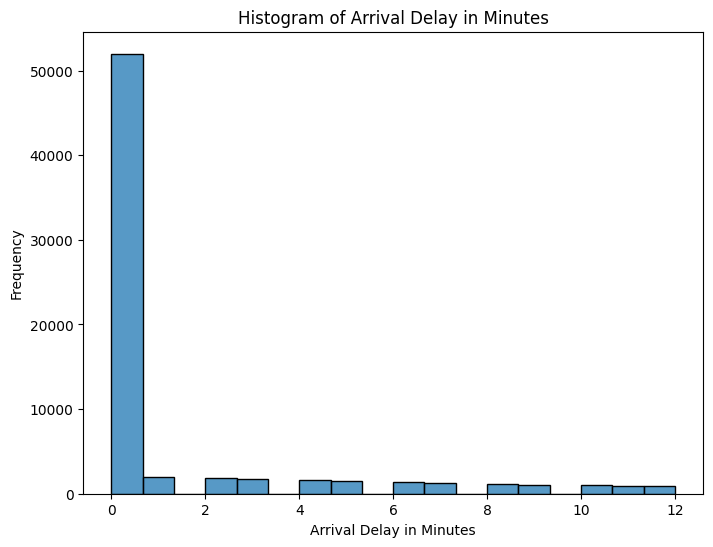

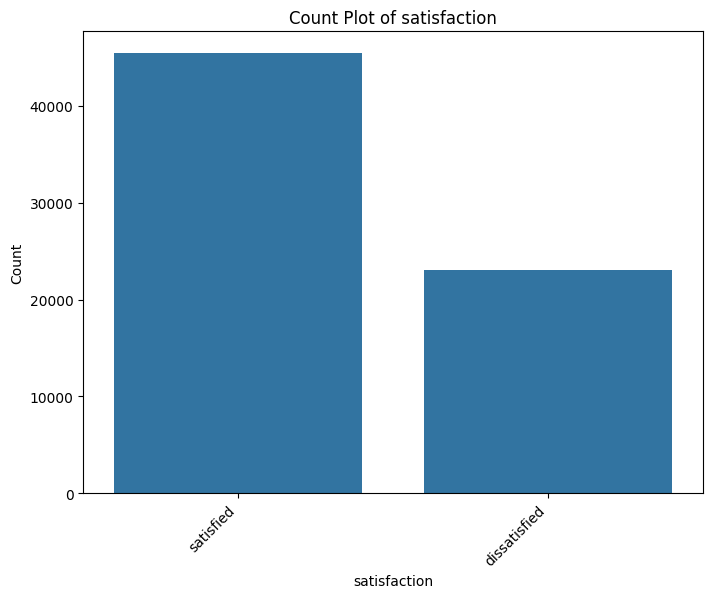

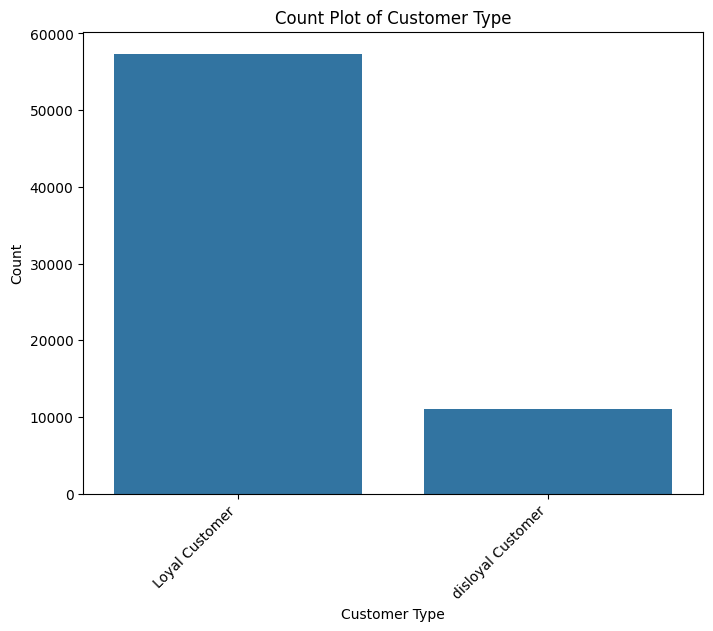

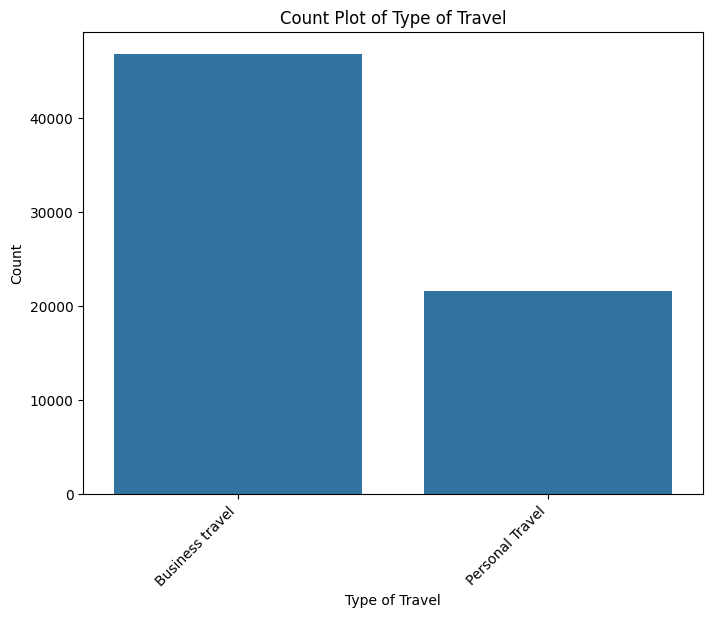

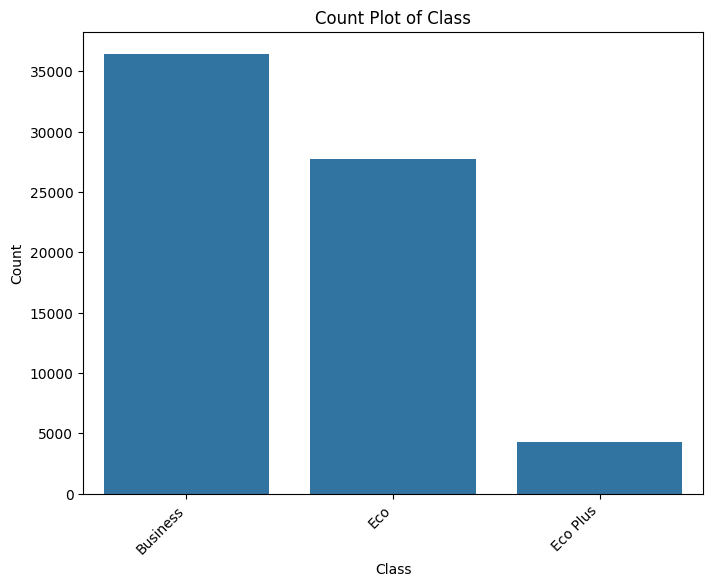

In [ ]:
numerical_features = data.select_dtypes(include=['number'])
for column in numerical_features.columns:
       plt.figure(figsize=(8, 6))  # Adjust figure size as needed
       sns.histplot(data[column])
       plt.title(f'Histogram of {column}')
       plt.xlabel(column)
       plt.ylabel('Frequency')
       plt.show()
categorical_features = data.select_dtypes(include=['object'])
for column in categorical_features.columns:
       plt.figure(figsize=(8, 6))  # Adjust figure size as needed
       sns.countplot(x=data[column], order=data[column].value_counts().index)
       plt.title(f'Count Plot of {column}')
       plt.xlabel(column)
       plt.ylabel('Count')
       plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
       plt.show()

In [ ]:
# Load the uploaded dataset again to recover the dropped column
file_path = '/content/Airline_customer_satisfaction.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
unique_satisfaction = data['satisfaction'].unique()

# Print the unique values
print(unique_satisfaction)

['satisfied' 'dissatisfied']


In [ ]:
satisfaction_mapping = {
    'satisfied': 1,
    'dissatisfied': 0,

}

data['satisfaction Encoded'] = data['satisfaction'].map(satisfaction_mapping)

In [ ]:
data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction Encoded
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,1
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,1
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,1
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,1
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,1


In [ ]:
# Drop the 'satisfaction' column
data = data.drop('satisfaction', axis=1)

# Display the first few rows to confirm the column is dropped
display(data.head())

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction Encoded
0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,...,3,3,0,3,5,3,2,0,0.0,1
1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,...,3,4,4,4,2,3,2,310,305.0,1
2,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,...,2,3,3,4,4,4,2,0,0.0,1
3,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,...,1,1,0,1,4,1,3,0,0.0,1
4,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,...,2,2,0,2,4,2,5,0,0.0,1


In [ ]:
unique_customer_Type = data['Customer Type'].unique()

# Print the unique values
print(unique_customer_Type)

['Loyal Customer' 'disloyal Customer']


In [ ]:
customer_Type_mapping = {
    'Loyal Customer': 1,
    'disloyal Customer': 0,

}

data[' Customer Type Encoded'] = data['Customer Type'].map(customer_Type_mapping)

In [ ]:

data = data.drop('Customer Type', axis=1)

# Display the first few rows to confirm the column is dropped
display(data.head())

,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction Encoded,Customer Type Encoded
0,65,Personal Travel,Eco,265,0,0,0,2,2,4,...,3,0,3,5,3,2,0,0.0,1,1
1,47,Personal Travel,Business,2464,0,0,0,3,0,2,...,4,4,4,2,3,2,310,305.0,1,1
2,15,Personal Travel,Eco,2138,0,0,0,3,2,0,...,3,3,4,4,4,2,0,0.0,1,1
3,60,Personal Travel,Eco,623,0,0,0,3,3,4,...,1,0,1,4,1,3,0,0.0,1,1
4,70,Personal Travel,Eco,354,0,0,0,3,4,3,...,2,0,2,4,2,5,0,0.0,1,1


In [ ]:
unique_Type_of_Travel = data['Type of Travel'].unique()

# Print the unique values
print(unique_Type_of_Travel)

['Personal Travel' 'Business travel']


In [ ]:
Type_of_Travel_mapping = {
    'Personal Travel': 1,
    'Business travel': 0 # Corrected 'Business Travel' to 'Business travel'

}

data[' Type of Travel Encoded'] = data['Type of Travel'].map(Type_of_Travel_mapping)

In [ ]:
data = data.drop('Type of Travel', axis=1)

# Display the first few rows to confirm the column is dropped
display(data.head())

,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction Encoded,Customer Type Encoded,Type of Travel Encoded
0,65,Eco,265,0,0,0,2,2,4,2,...,0,3,5,3,2,0,0.0,1,1,1
1,47,Business,2464,0,0,0,3,0,2,2,...,4,4,2,3,2,310,305.0,1,1,1
2,15,Eco,2138,0,0,0,3,2,0,2,...,3,4,4,4,2,0,0.0,1,1,1
3,60,Eco,623,0,0,0,3,3,4,3,...,0,1,4,1,3,0,0.0,1,1,1
4,70,Eco,354,0,0,0,3,4,3,4,...,0,2,4,2,5,0,0.0,1,1,1


In [ ]:
unique_Class = data['Class'].unique()

# Print the unique values
print(unique_Class)

['Eco' 'Business' 'Eco Plus']


In [ ]:
Class_mapping = {
    'Eco': 0,
    'Eco Plus': 1,
    'Business': 2
}

data[' Class Encoded'] = data['Class'].map(Class_mapping)

In [ ]:
data = data.drop('Class', axis=1)

# Display the first few rows to confirm the column is dropped
display(data.head())

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction Encoded,Customer Type Encoded,Type of Travel Encoded,Class Encoded
0,65,265,0,0,0,2,2,4,2,3,...,3,5,3,2,0,0.0,1,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,4,2,3,2,310,305.0,1,1,1,2
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,4,2,0,0.0,1,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,4,1,3,0,0.0,1,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,2,4,2,5,0,0.0,1,1,1,0


In [ ]:

# Splitting into Train and Test Dataset

X = data.drop('satisfaction Encoded', axis=1)
y = data['satisfaction Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

        Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
18386    40             1586             3                                  3   
115613   49             1974             1                                  1   
68138    21             4373             1                                  3   
78244    54             1471             2                                  1   
34472    68             1905             4                                  4   
...     ...              ...           ...                                ...   
128106   42             1710             3                                  3   
103694   51             2148             4                                  5   
860      64             1206             1                                  0   
15795    22             1193             3                                  3   
121958   48              245             5                                  3   

        Food and drink  Gat

In [ ]:
# Impute missing values in 'Arrival Delay in Minutes' with the mean
X_train['Arrival Delay in Minutes'].fillna(X_train['Arrival Delay in Minutes'].mean(), inplace=True)
X_test['Arrival Delay in Minutes'].fillna(X_test['Arrival Delay in Minutes'].mean(), inplace=True)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

/tmp/ipython-input-63-61348600.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Arrival Delay in Minutes'].fillna(X_train['Arrival Delay in Minutes'].mean(), inplace=True)
/tmp/ipython-input-63-61348600.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

[0.86587238 0.07333882 0.71925979 ... 0.11581321 0.39637375 0.78403628]


In [ ]:
print(regressor.coef_)

print(regressor.intercept_)

[-1.33821241e-03 -2.21066469e-05  4.91167573e-02 -3.63300052e-02
 -3.21070265e-02  1.83122157e-02 -9.72975290e-03  1.11878293e-01
  1.71240934e-02  3.83510850e-02  4.54336525e-02  3.37578067e-02
  1.19952695e-02  3.92786798e-02  9.05650462e-03  1.85370937e-02
  2.69623794e-04 -8.77956896e-04  2.87078809e-01 -1.09949110e-01
  4.98001915e-02]
-0.6809533742641689


In [ ]:
mean_squared_error(y_test, y_pred)

0.13364143568016207

In [ ]:
# Calculate and display regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.13364143568016207
R-squared: 0.46014709766349515


To calculate classification metrics, we need to convert the continuous predictions from the linear regression model into binary classes. A common way to do this is to set a threshold (e.g., 0.5).

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     17554
           1       0.84      0.84      0.84     21410

    accuracy                           0.83     38964
   macro avg       0.83      0.83      0.83     38964
weighted avg       0.83      0.83      0.83     38964



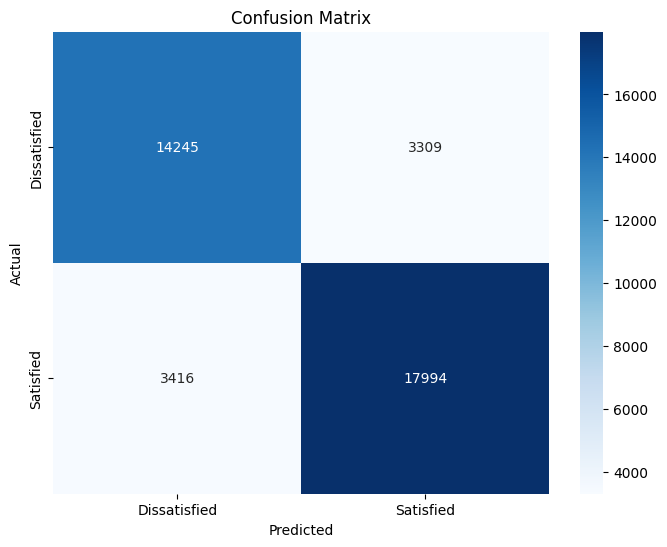

In [ ]:
# Convert regression predictions to binary predictions using a threshold
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate and display classification metrics
print(classification_report(y_test, y_pred_binary))

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dissatisfied', 'Satisfied'], yticklabels=['Dissatisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()